In [1]:
## import necessary modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style('darkgrid')

## Display all the columns of the dataframe

pd.pandas.set_option('display.max_columns',None)

In [14]:
df=pd.read_csv("UCI_Credit_Card.csv")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [15]:
df = df.rename(columns={"default.payment.next.month": "default"})
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [23]:
df_default_1=df[df["default"]==1]

In [24]:
df_default_1.shape

(6636, 25)

In [25]:
max_thresold=df_default_1["LIMIT_BAL"].quantile(0.95)
max_thresold

360000.0

In [26]:
df_default_1[df_default_1["LIMIT_BAL"]<max_thresold].shape[0]

6188

In [27]:
df_default_1=df_default_1[df_default_1["LIMIT_BAL"]<max_thresold]

In [28]:
df_default_1.shape

(6188, 25)

<AxesSubplot:xlabel='LIMIT_BAL'>

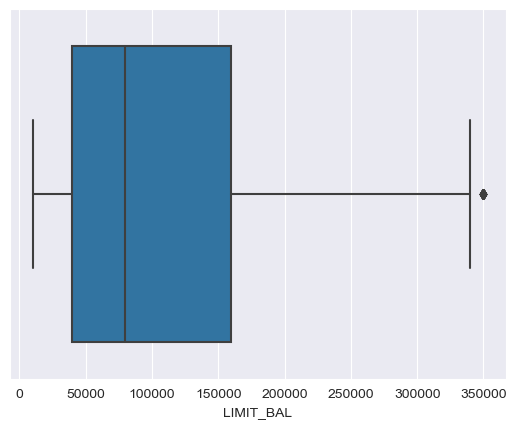

In [29]:
sns.boxplot(x="LIMIT_BAL",data=df_default_1)

In [30]:
df_default_0=df[df["default"]==0]

In [31]:
df_default_0.shape

(23364, 25)

In [32]:
max_thresold_0=df_default_0["LIMIT_BAL"].quantile(0.95)
max_thresold_0

450000.0

In [33]:
df_default_0[df_default_0["LIMIT_BAL"]<max_thresold].shape[0]

20455

In [34]:
df_default_0=df_default_0[df_default_0["LIMIT_BAL"]<max_thresold]

In [35]:
df_default_0.shape

(20455, 25)

<AxesSubplot:xlabel='LIMIT_BAL'>

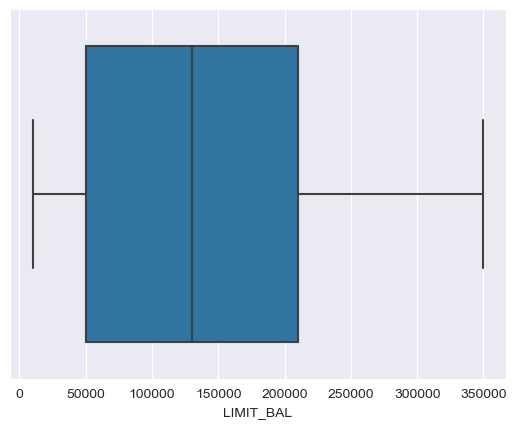

In [36]:
sns.boxplot(x="LIMIT_BAL",data=df_default_0)

In [37]:
df = pd.concat([df_default_0, df_default_1], ignore_index=True, sort=False)

In [38]:
df.shape

(26643, 25)

In [39]:
# # Dividing dependent and independent variables
X = df.drop("default", axis=1)
y = df["default"]

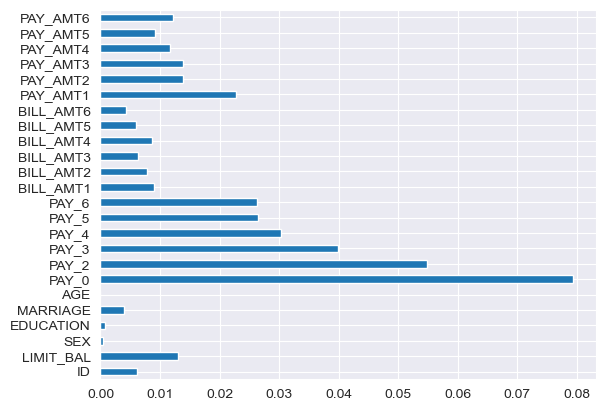

In [40]:
from sklearn.feature_selection import mutual_info_classif

importances=mutual_info_classif(X,y)
feat_importances=pd.Series(importances,df.columns[0:len(df.columns)-1])
feat_importances.plot(kind="barh")
plt.grid(True)
plt.show()

In [41]:
X=pd.DataFrame({"LIMIT_BAL":df["LIMIT_BAL"],"PAY_0":df["PAY_0"],"PAY_2":df["PAY_2"],"PAY_3":df["PAY_3"],"PAY_4":df["PAY_4"],"PAY_5":df["PAY_5"],"PAY_6":df["PAY_6"],"PAY_AMT1":df["PAY_AMT1"],"PAY_AMT2":df["PAY_AMT2"],"PAY_AMT3":df["PAY_AMT3"],"PAY_AMT6":df["PAY_AMT6"]})

In [42]:
X.head(2)

,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT6
0,90000.0,0,0,0,0,0,0,1518.0,1500.0,1000.0,5000.0
1,50000.0,0,0,0,0,0,0,2000.0,2019.0,1200.0,1000.0


In [43]:
X.shape

(26643, 11)

In [44]:
y.value_counts()

0    20455
1     6188
Name: default, dtype: int64

In [46]:
# Sampling
# Balanacing dataset
from imblearn.over_sampling import SMOTE 
from collections import Counter

sampler = SMOTE()
X, y = sampler.fit_resample(X, y)

print('SMOTE {}'.format(Counter(y)))

SMOTE Counter({0: 20455, 1: 20455})


In [50]:
#Encoding the data
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X = df.apply(le.fit_transform)

In [52]:
df.to_csv("featured_train.csv")